In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("crime_data.csv", header=None, names=['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'])

data = data.dropna()

print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     50 non-null     object
 1   Murder    50 non-null     object
 2   Assault   50 non-null     object
 3   UrbanPop  50 non-null     object
 4   Rape      50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB
None
          State Murder Assault UrbanPop  Rape
count        50     50      50       50    50
unique       50     43      45       36    48
top     Alabama   13.2     120       66  14.9
freq          1      2       3        4     2
        State Murder Assault UrbanPop  Rape
1     Alabama   13.2     236       58  21.2
2      Alaska     10     263       48  44.5
3     Arizona    8.1     294       80    31
4    Arkansas    8.8     190       50  19.5
5  California      9     276       91  40.6


In [2]:
X = data.drop('State', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

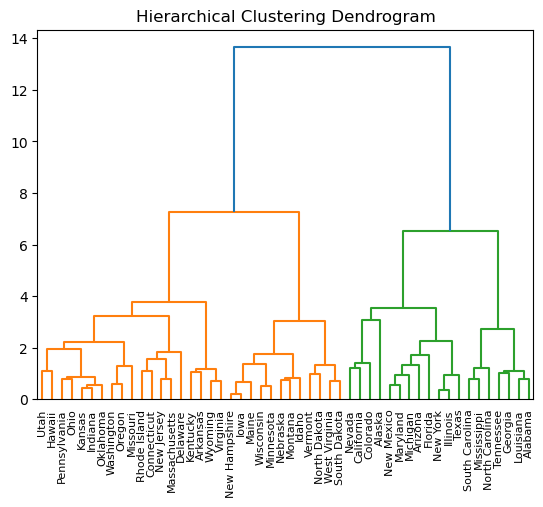

In [3]:
# Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, labels=data['State'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [4]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, distance_threshold=None, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

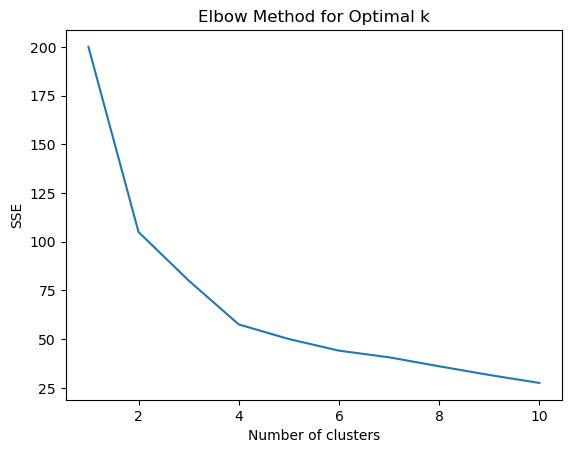

In [5]:
# K-means Clustering
# Using the Elbow method to find the optimal number of clusters

import warnings
# Suppress KMeans memory leak warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
# Plot the Elbow method to find the optimal number of clusters for K-means
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')  #  sum of squared distances
plt.show()

In [6]:
# K-means Clustering
kmeans = KMeans(n_clusters=4, n_init=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [7]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [8]:
# Evaluate clustering using silhouette score
silhouette_agg = silhouette_score(X_scaled, agg_labels)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)

# Print silhouette scores
print(f'Silhouette Score (Hierarchical Clustering): {silhouette_agg}')
print(f'Silhouette Score (K-means Clustering): {silhouette_kmeans}')
print(f'Silhouette Score (DBSCAN Clustering): {silhouette_dbscan}')

# Add the cluster labels to the original data for analysis
data['Agg_Cluster'] = agg_labels
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

Silhouette Score (Hierarchical Clustering): 0.3370187183556962
Silhouette Score (K-means Clustering): 0.3441080718209351
Silhouette Score (DBSCAN Clustering): 0.23455598753159795


In [9]:
# Converting the variable type from object to numeric

data['Murder'] = pd.to_numeric(data['Murder'], errors='coerce')
data['Assault'] = pd.to_numeric(data['Assault'], errors='coerce')
data['UrbanPop'] = pd.to_numeric(data['UrbanPop'], errors='coerce')
data['Rape'] = pd.to_numeric(data['Rape'], errors='coerce')

In [10]:
num_clusters_agg = len(np.unique(agg_labels[agg_labels != -1]))
num_clusters_kmeans = kmeans.n_clusters
num_clusters_dbscan = len(np.unique(dbscan_labels[dbscan_labels != -1]))


print("Number of Clusters (Hierarchical Clustering):", num_clusters_agg)
print("Number of Clusters (K-means Clustering):", num_clusters_kmeans)
print("Number of Clusters (DBScan Clustering):", num_clusters_dbscan)

Number of Clusters (Hierarchical Clustering): 4
Number of Clusters (K-means Clustering): 4
Number of Clusters (DBScan Clustering): 1


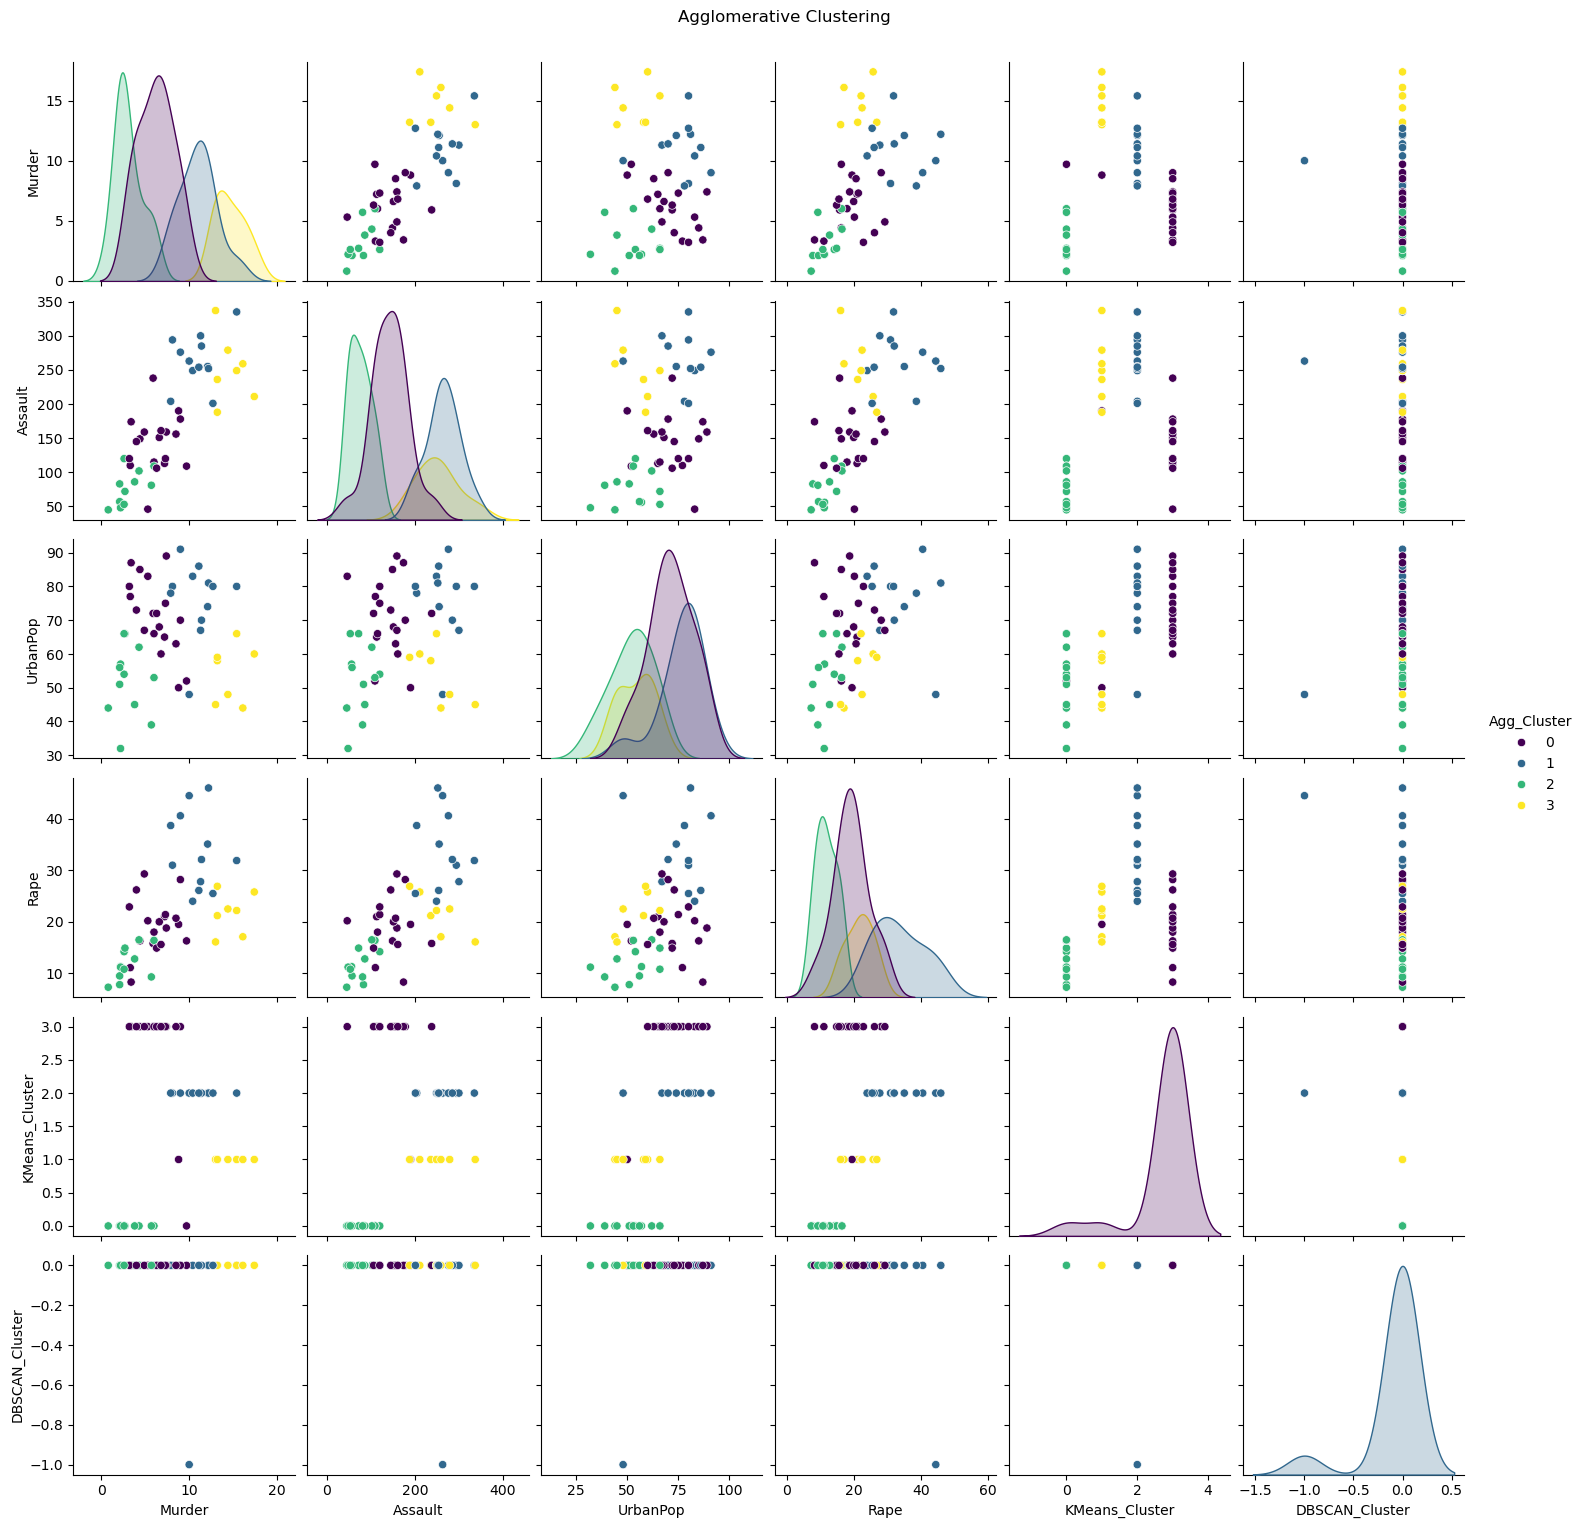

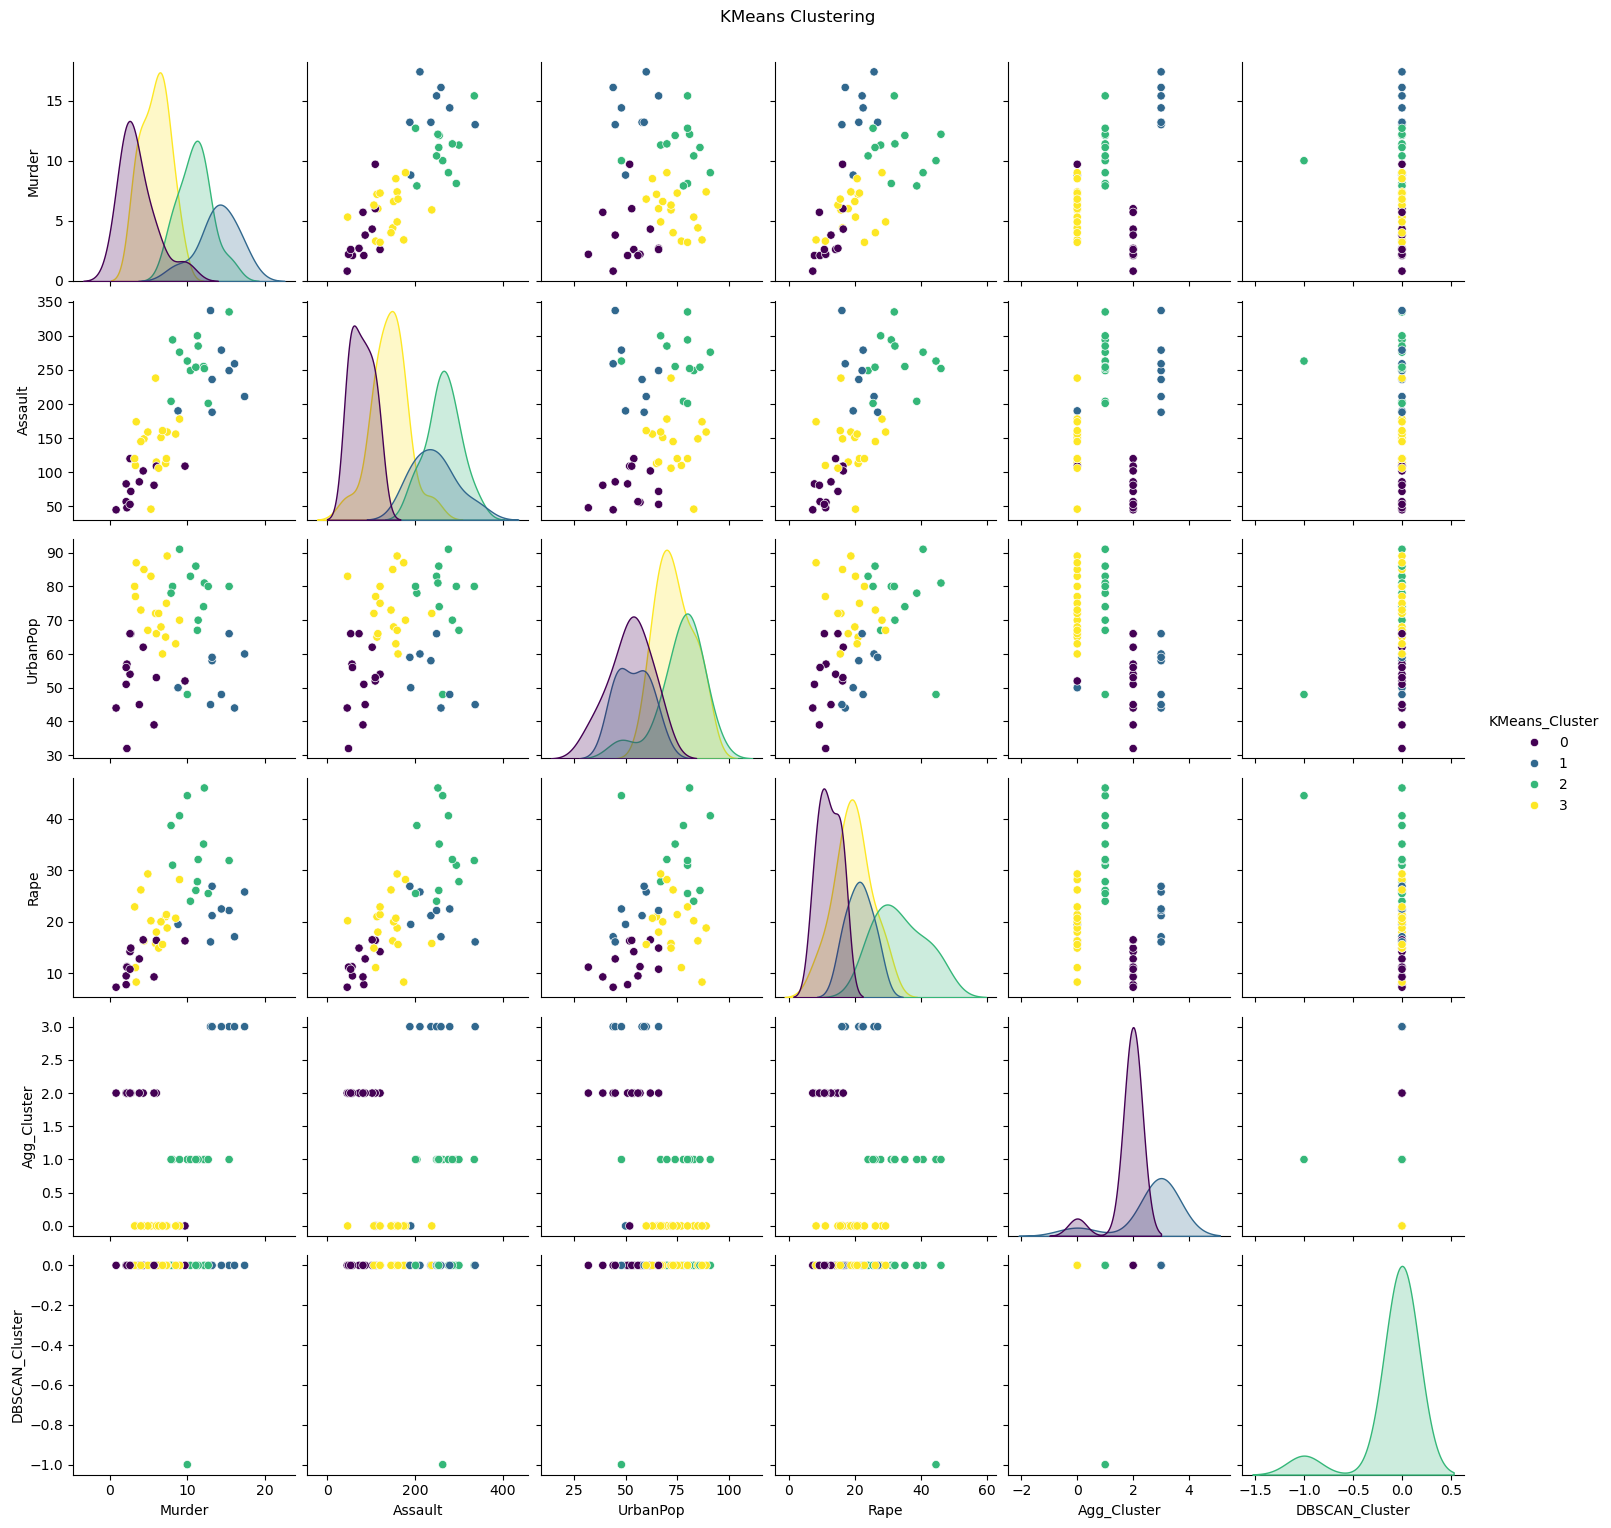

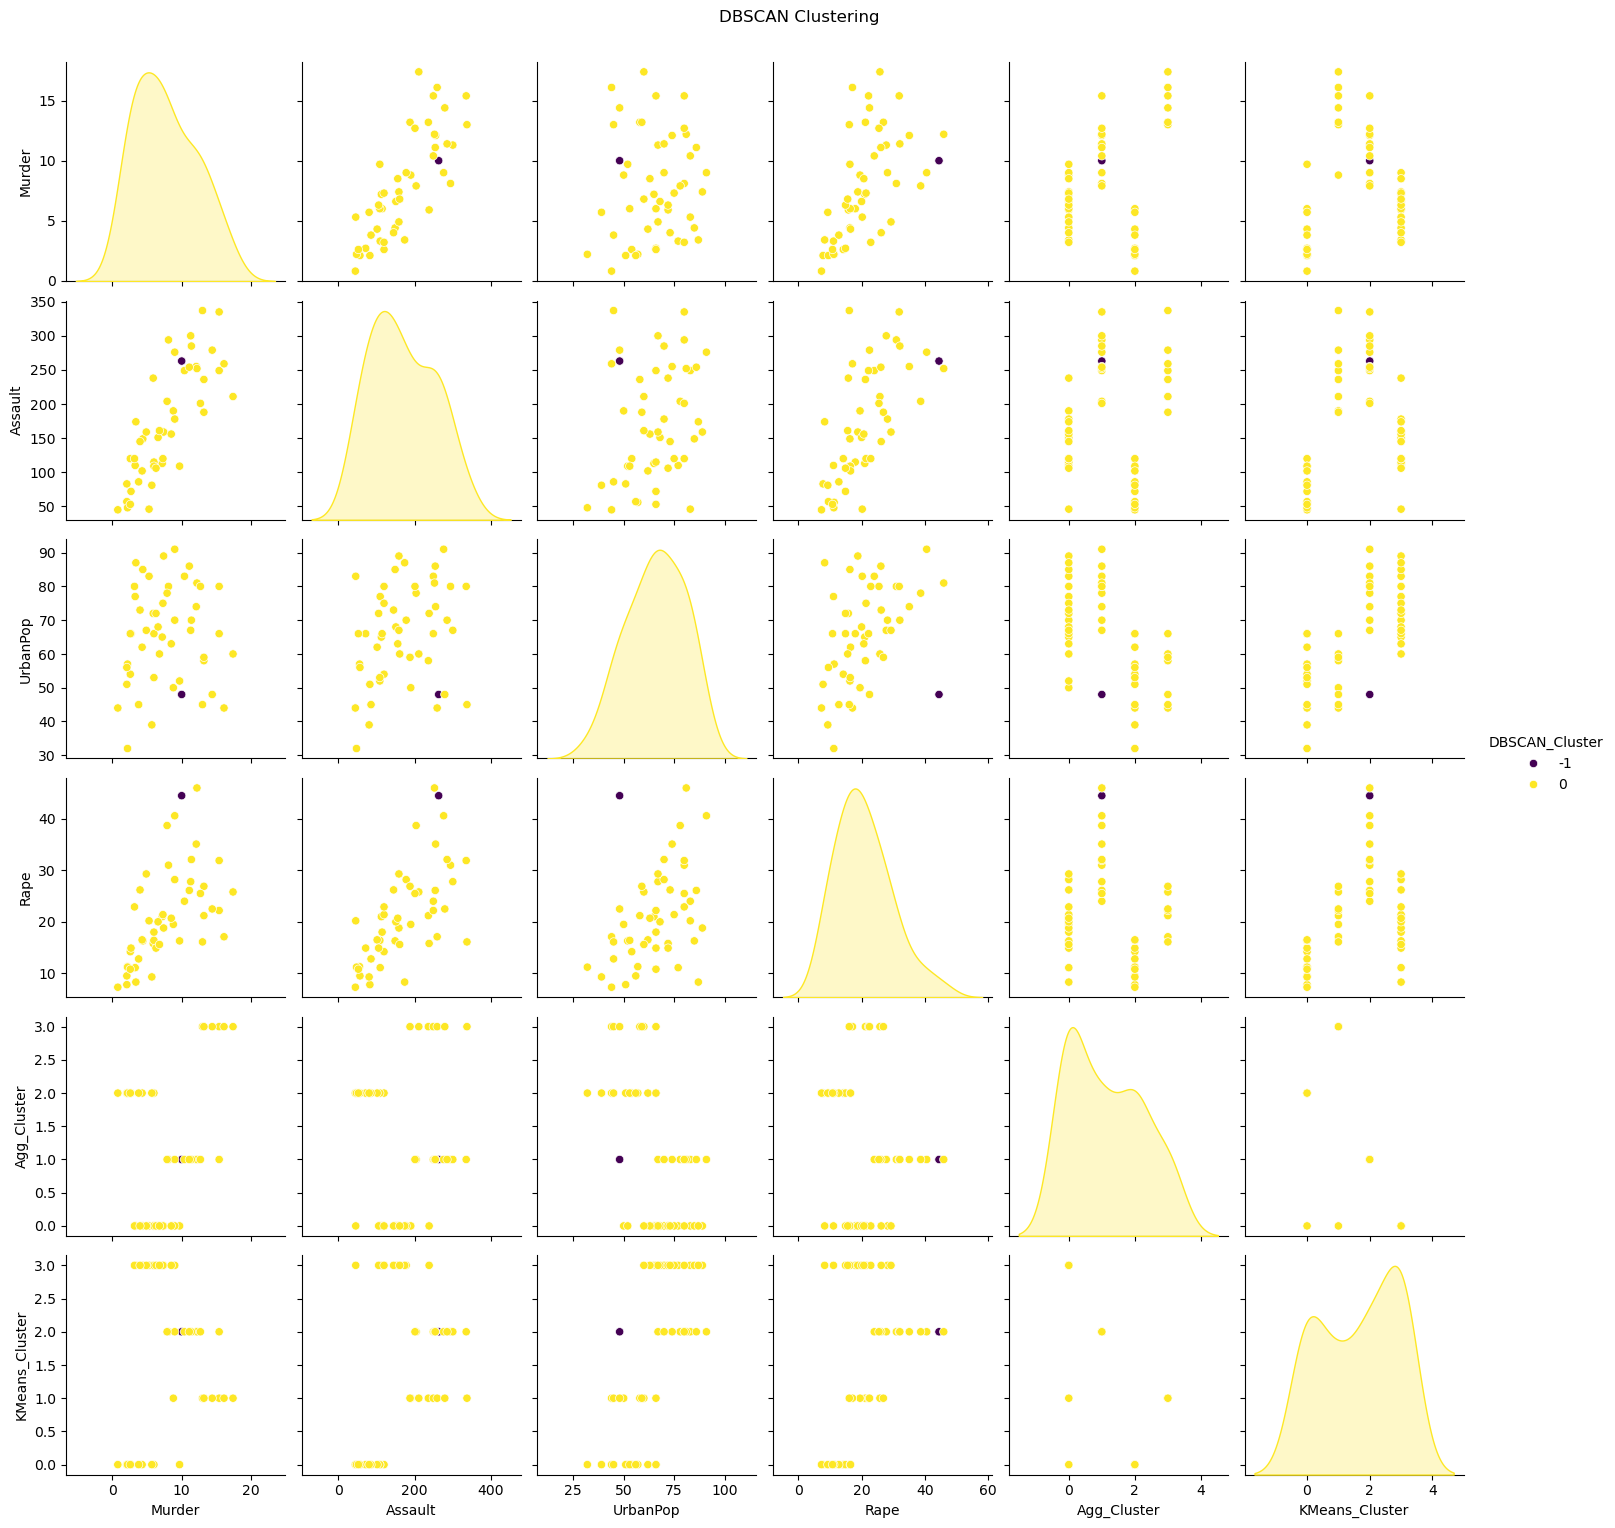

In [11]:
#temp_data = data['State', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'Agg_Cluster']

# Pair plot for Agglomerative Clustering
sns.pairplot(data, hue='Agg_Cluster', palette='viridis')
plt.suptitle('Agglomerative Clustering', y=1.02)
plt.show()

# Pair plot for KMeans clustering
sns.pairplot(data, hue='KMeans_Cluster', palette='viridis')
plt.suptitle('KMeans Clustering', y=1.02)
plt.show()

# Pair plot for DBSCAN clustering
sns.pairplot(data, hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle('DBSCAN Clustering', y=1.02)
plt.show()

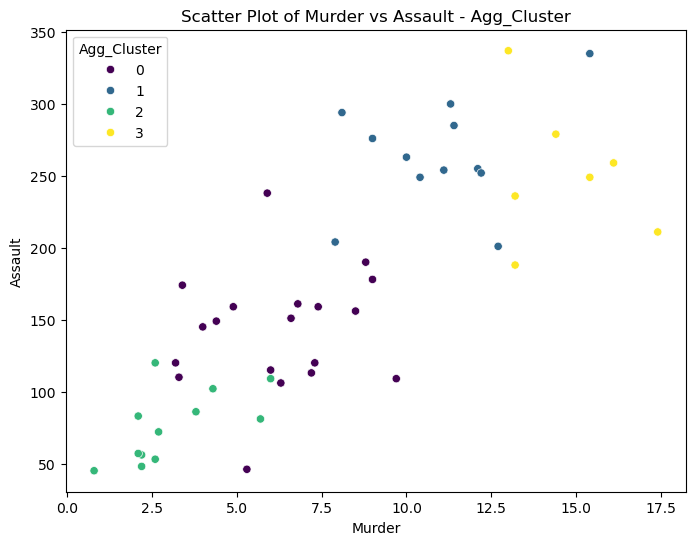

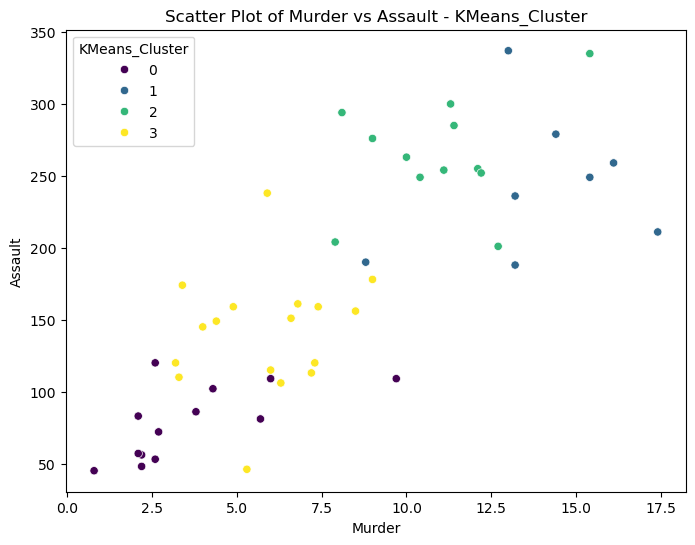

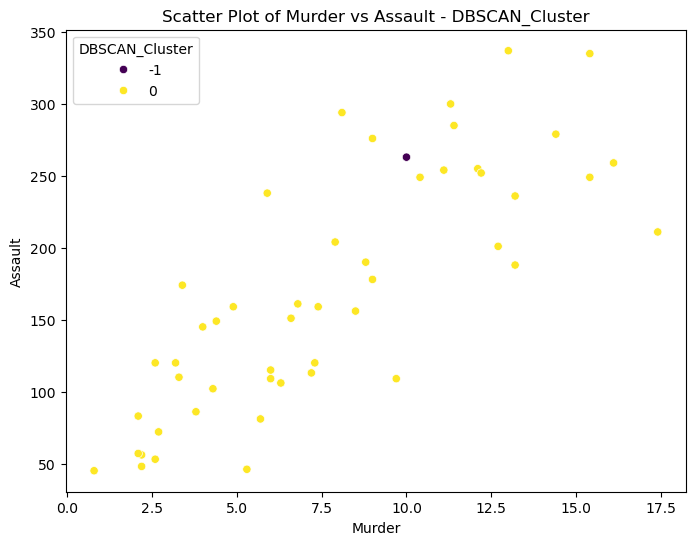

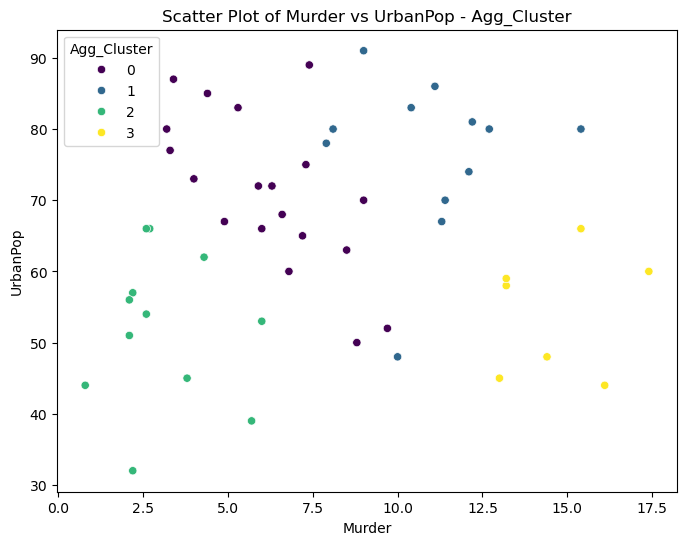

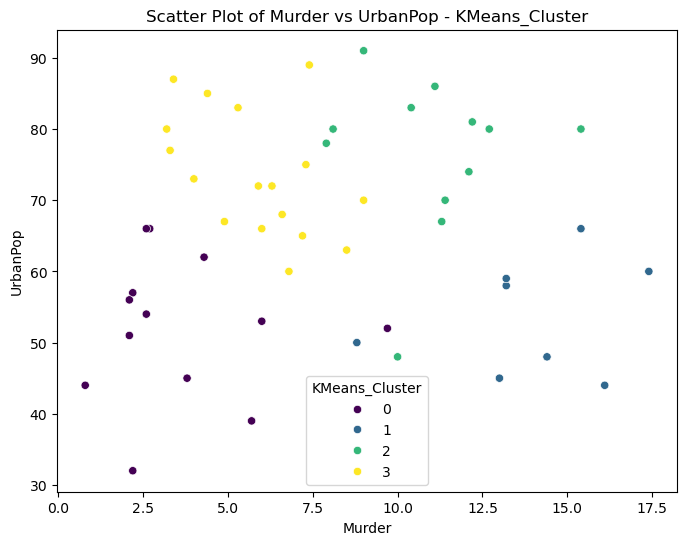

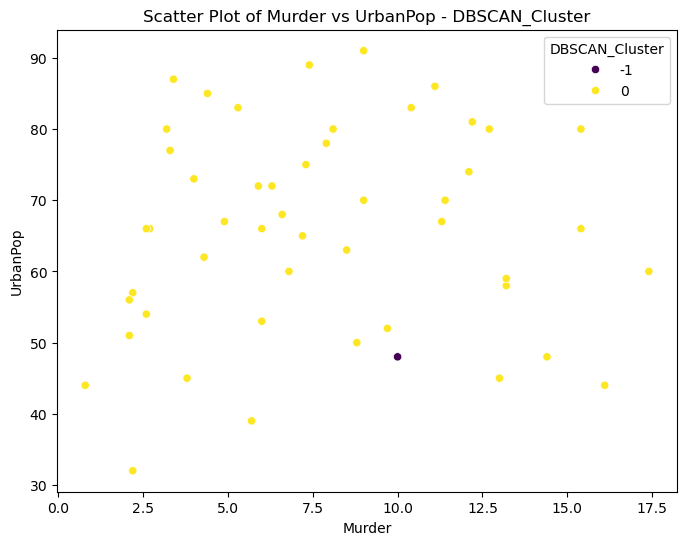

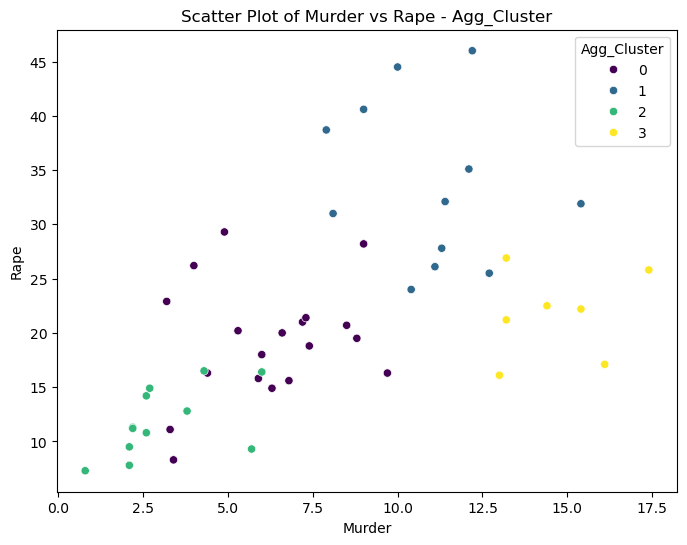

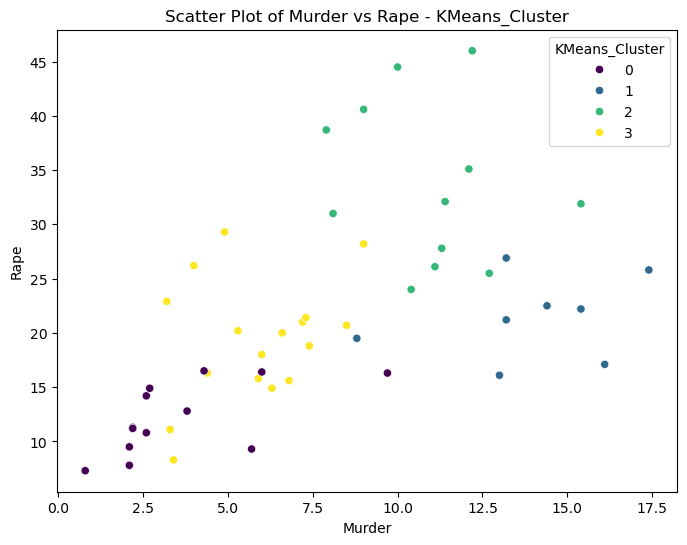

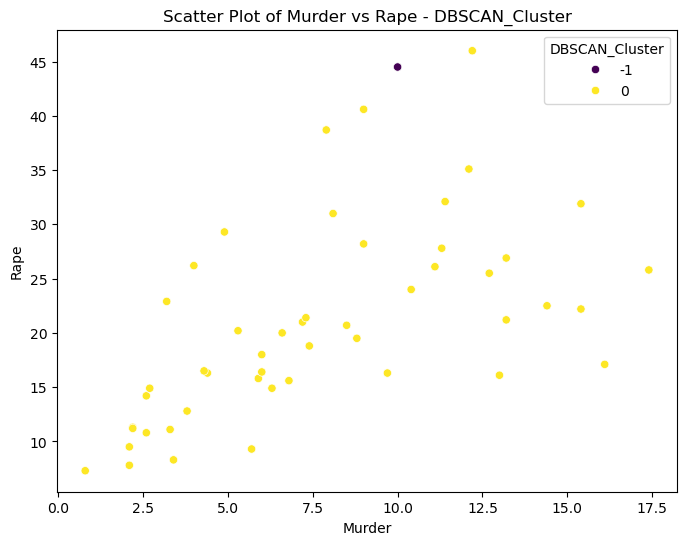

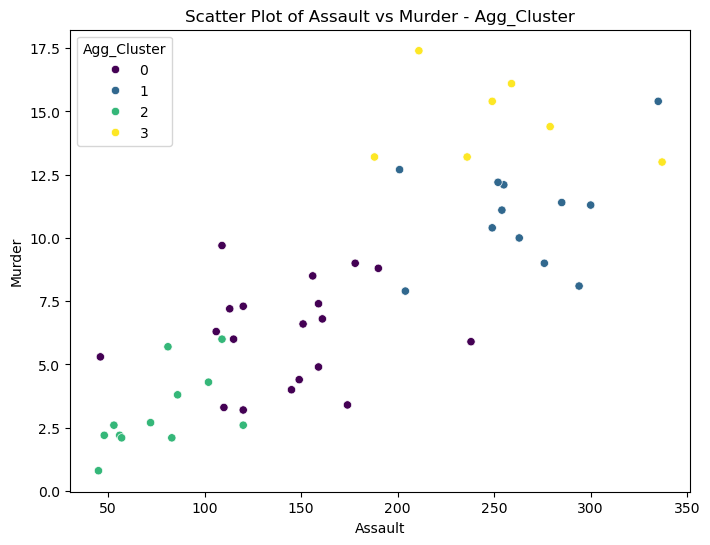

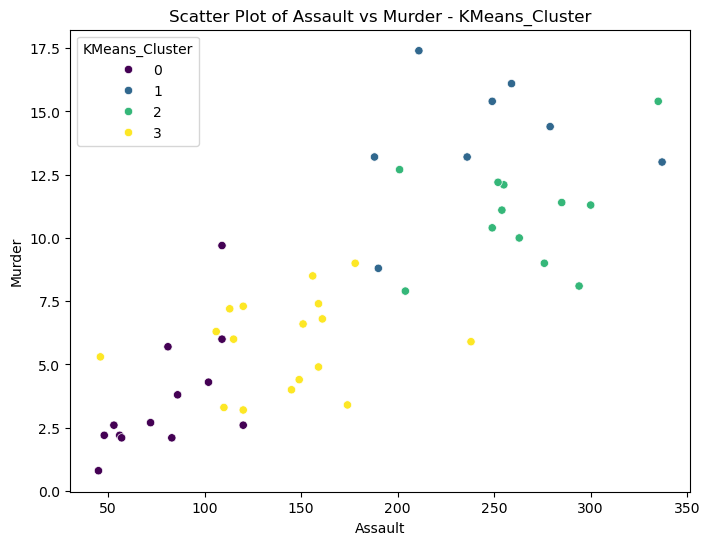

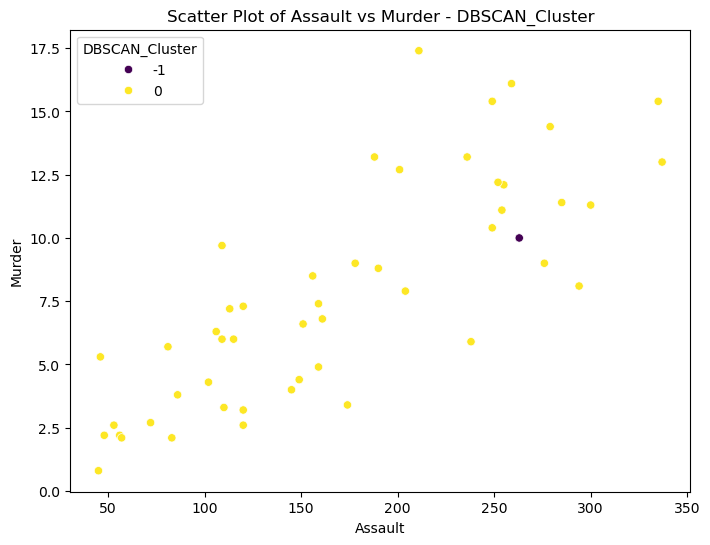

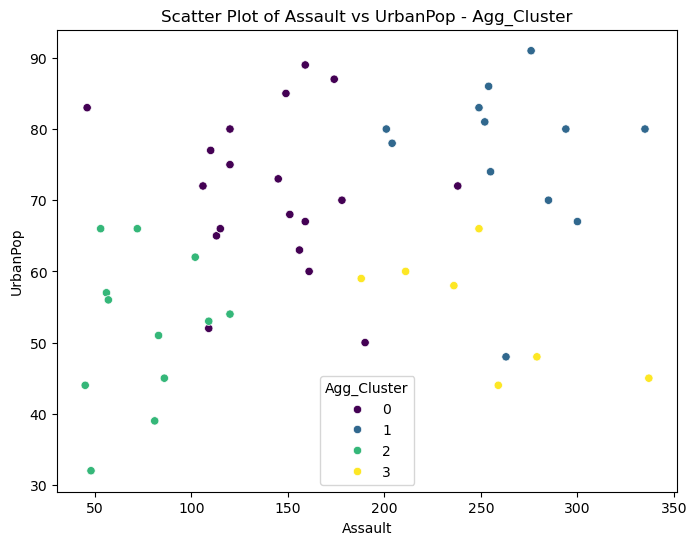

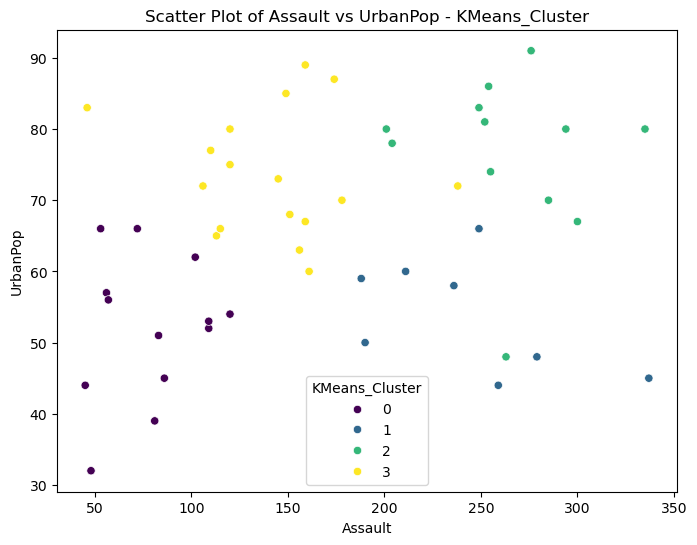

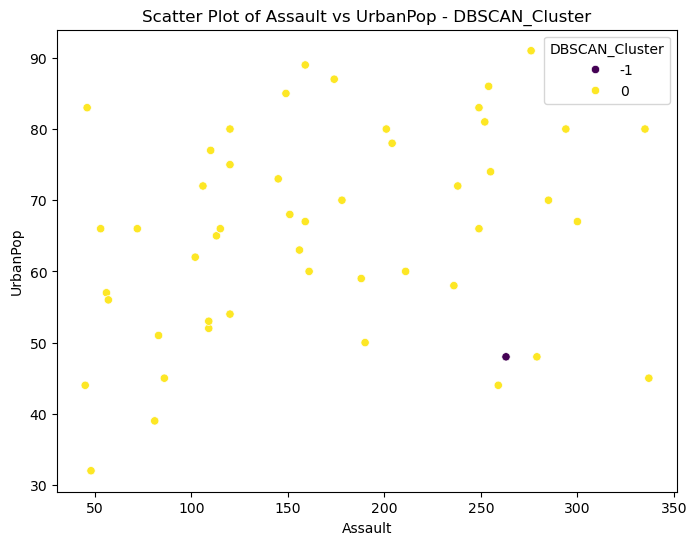

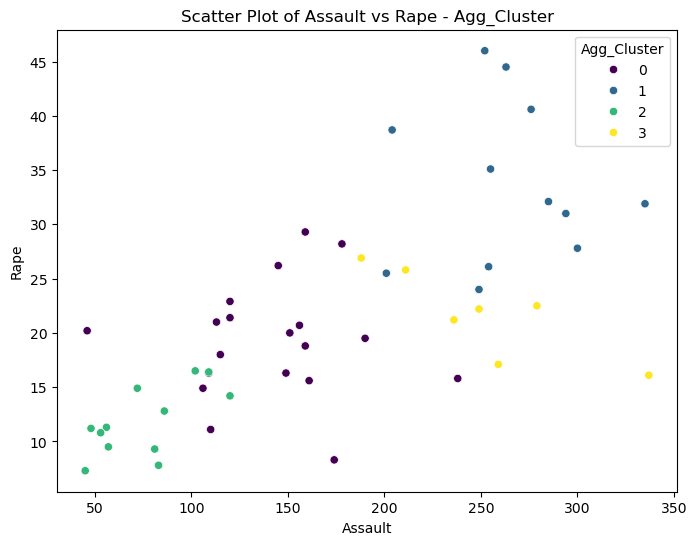

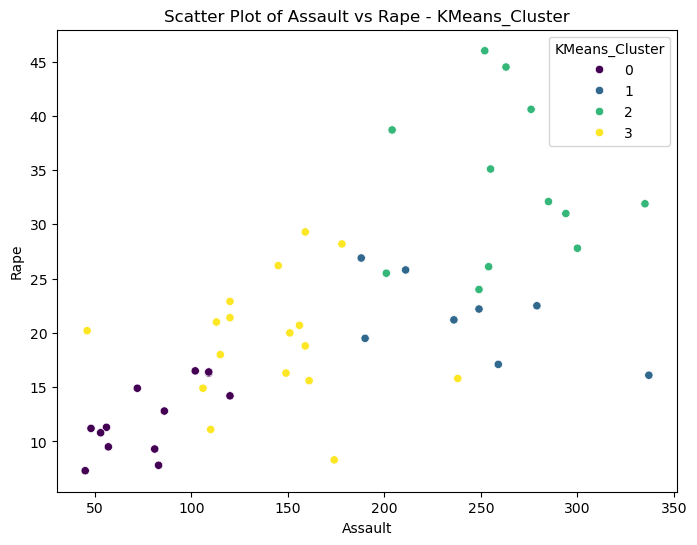

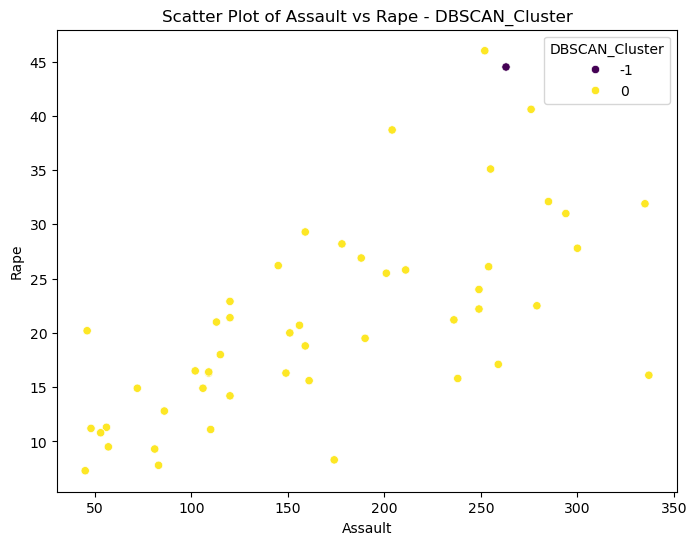

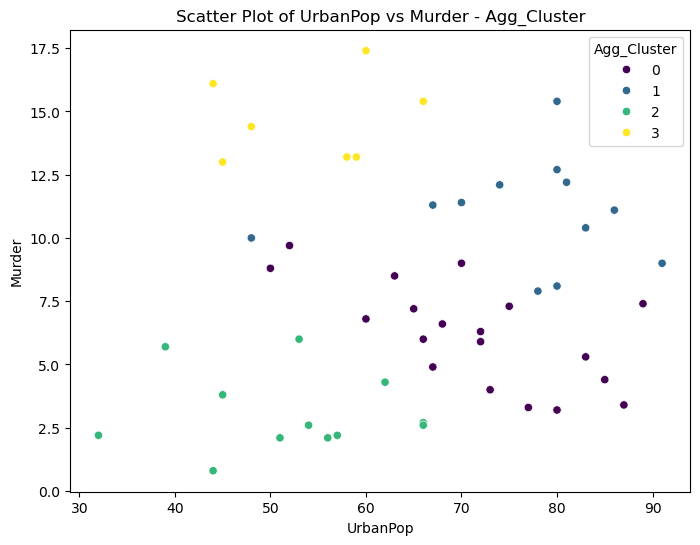

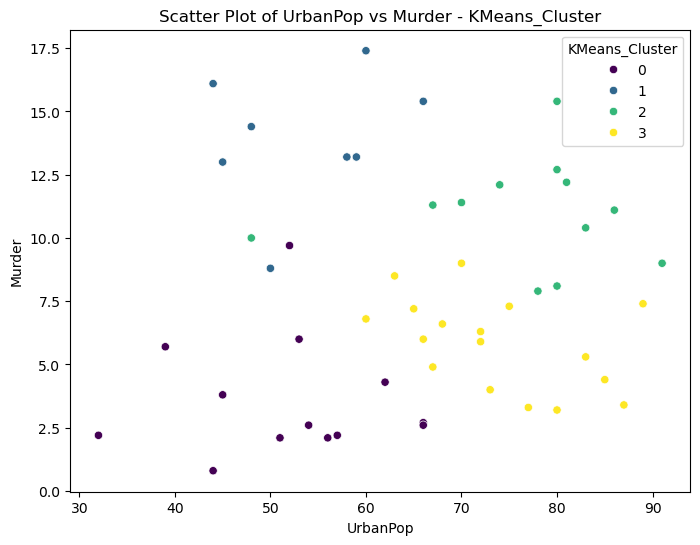

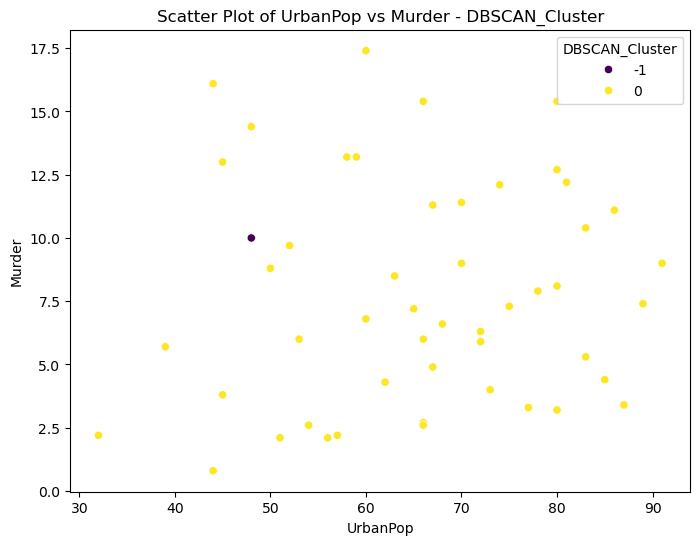

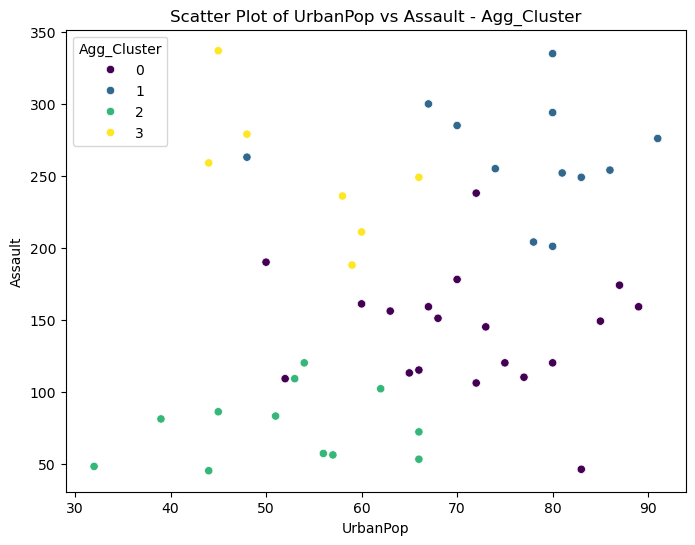

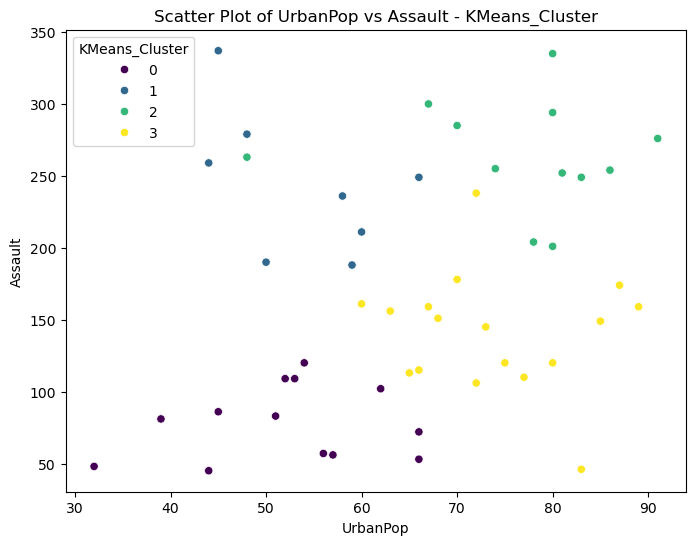

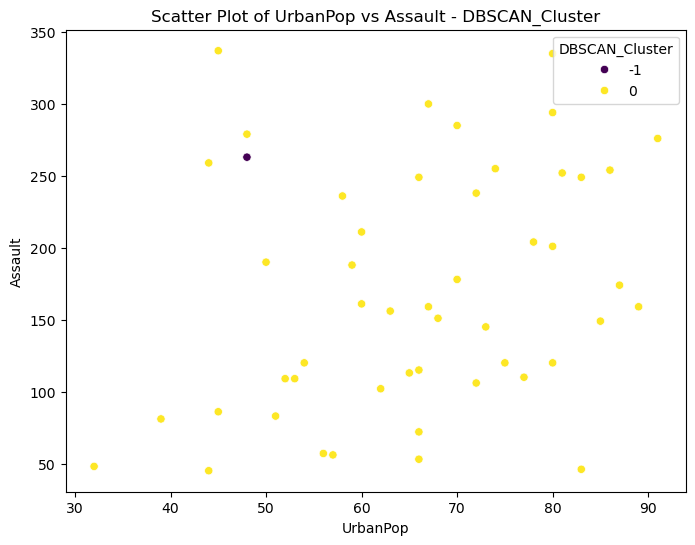

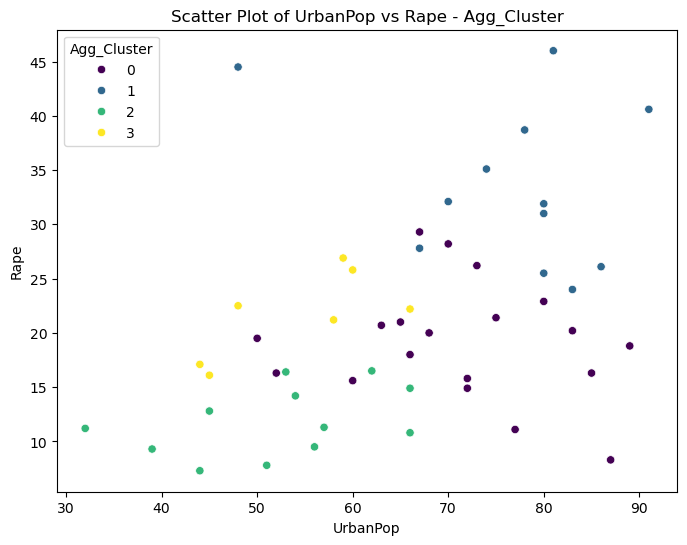

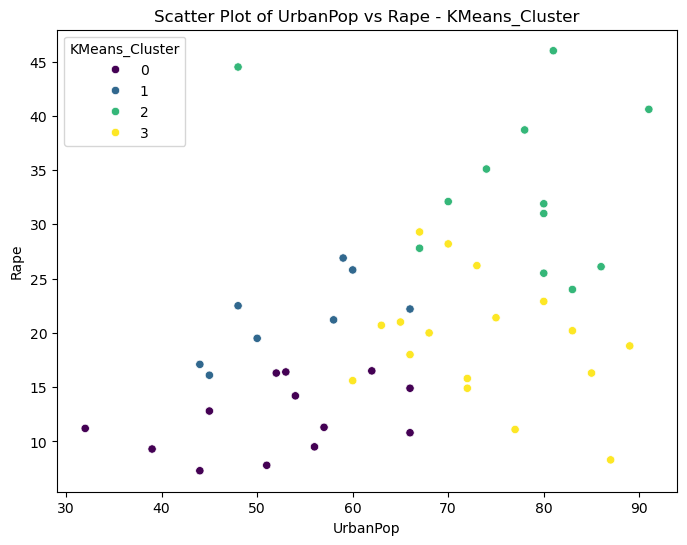

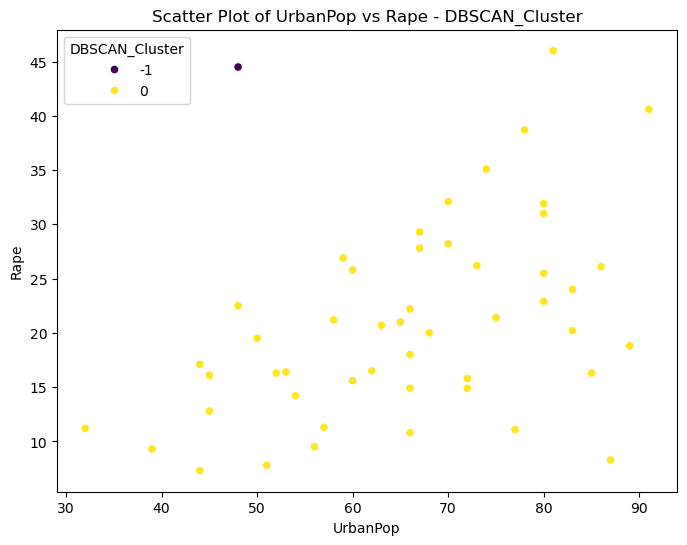

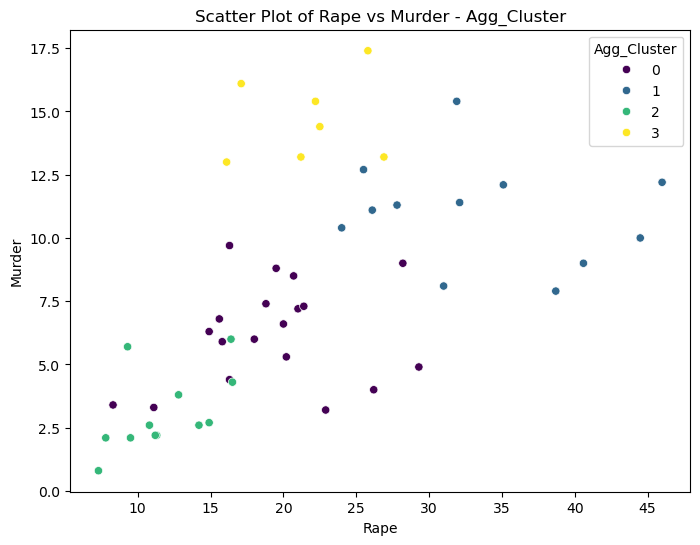

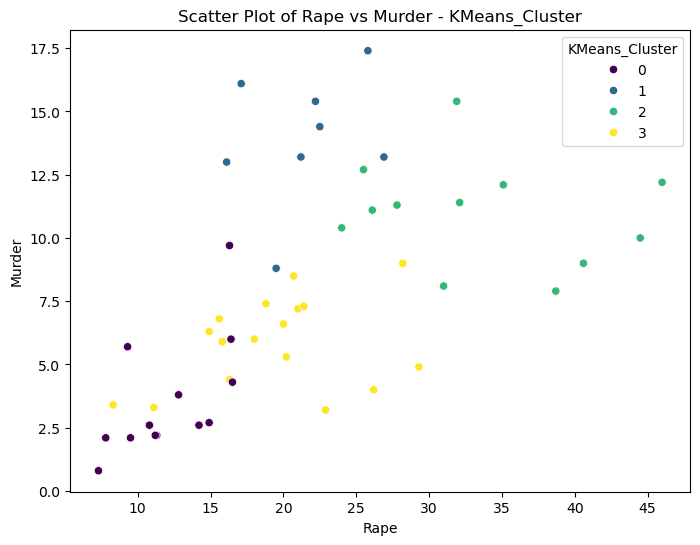

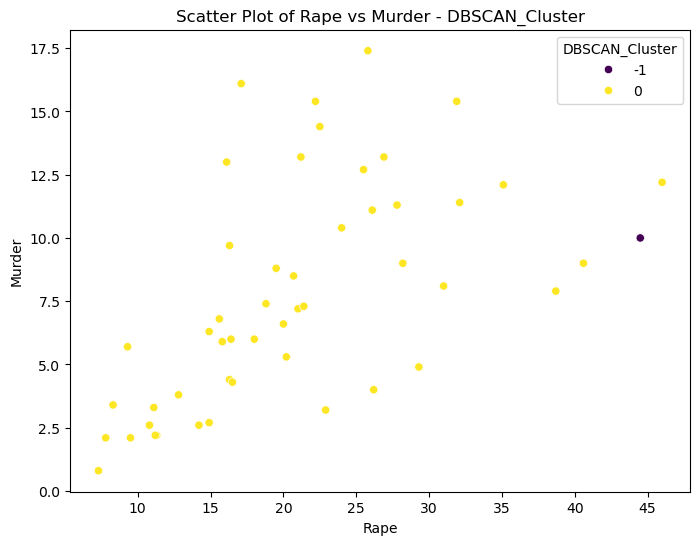

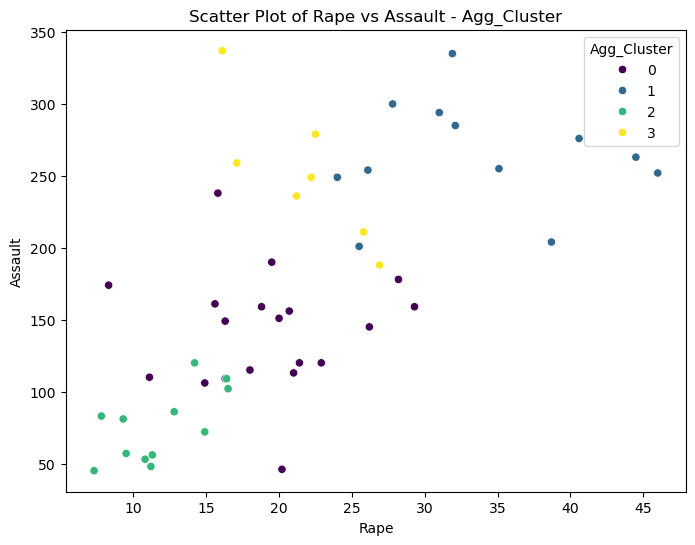

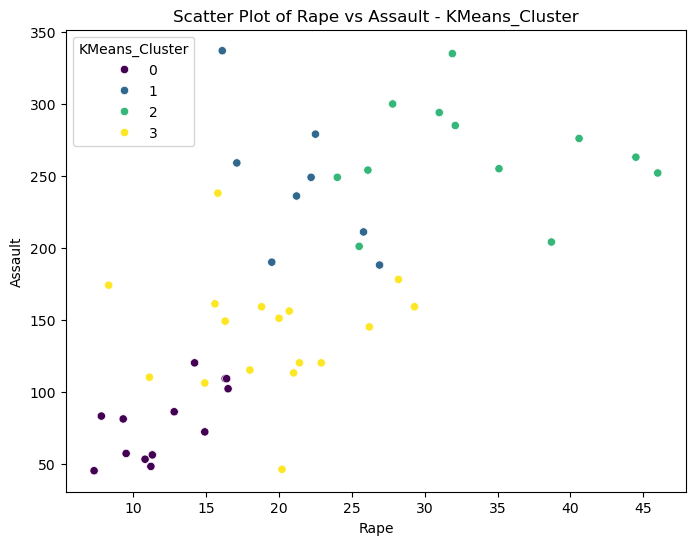

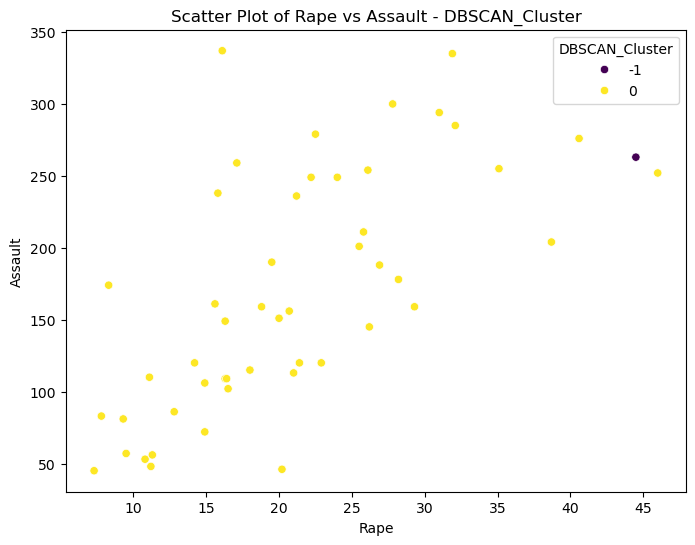

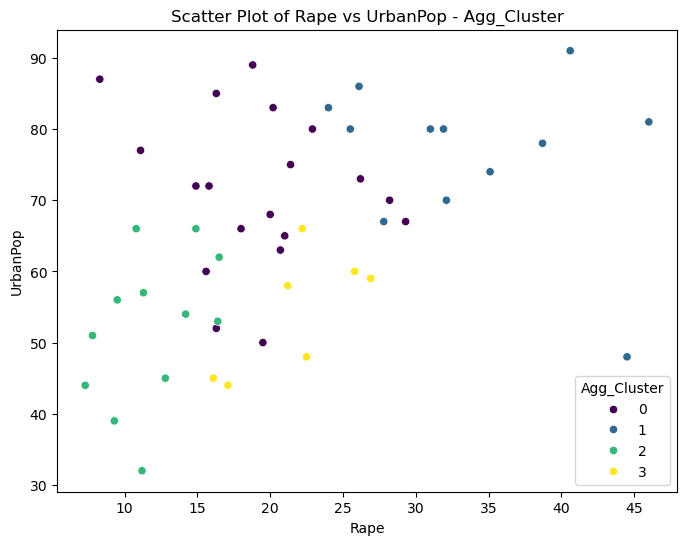

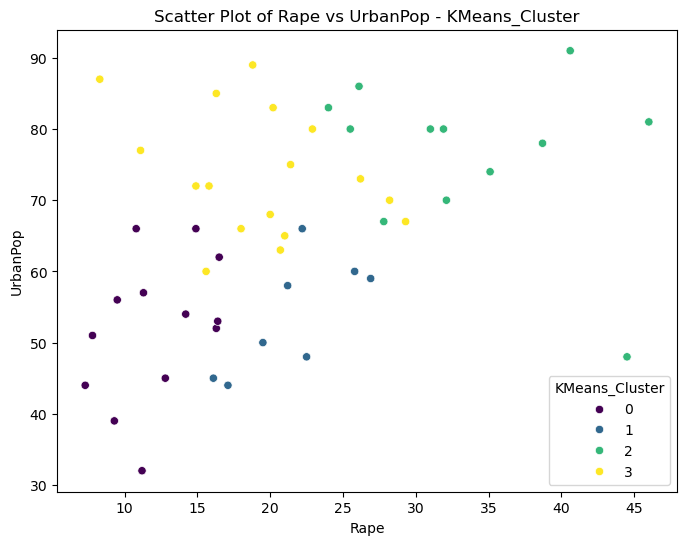

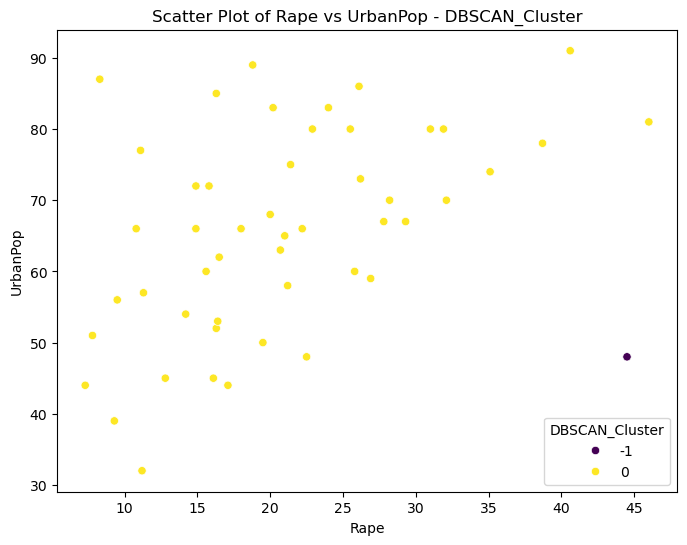

In [12]:
# List of features
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']

# List of clustering labels
cluster_labels = ['Agg_Cluster', 'KMeans_Cluster', 'DBSCAN_Cluster']

# Iterate over pairs of features and clustering labels
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            # Create scatter plot for each clustering label
            for label in cluster_labels:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(x=feature1, y=feature2, hue=label, data=data, palette='viridis')
                plt.title(f'Scatter Plot of {feature1} vs {feature2} - {label}')
                plt.show()

In [13]:
# Drawing inferences from the clusters obtained.

temp_data = data.drop('State', axis=1)

hierarchical_cluster_means = temp_data.groupby('Agg_Cluster').mean()
KMeans_cluster_means = temp_data.groupby('KMeans_Cluster').mean()
DBSCAN_cluster_means = temp_data.groupby('DBSCAN_Cluster').mean()

# Display the cluster means
print("hierarchical_cluster_means")
print("")
print(hierarchical_cluster_means)
print("")
print("")

print("KMeans_cluster_means")
print("")
print(KMeans_cluster_means)
print("")
print("")

print("DBSCAN_cluster_means")
print("")
print(DBSCAN_cluster_means)
print("")
print("")

hierarchical_cluster_means

                Murder     Assault   UrbanPop       Rape  KMeans_Cluster  \
Agg_Cluster                                                                
0             6.210526  142.052632  71.263158  19.184211        2.736842   
1            10.966667  264.000000  76.500000  33.608333        2.000000   
2             3.091667   76.000000  52.083333  11.833333        0.000000   
3            14.671429  251.285714  54.285714  21.685714        1.000000   

             DBSCAN_Cluster  
Agg_Cluster                  
0                  0.000000  
1                 -0.083333  
2                  0.000000  
3                  0.000000  


KMeans_cluster_means

                   Murder     Assault   UrbanPop       Rape  Agg_Cluster  \
KMeans_Cluster                                                             
0                3.600000   78.538462  52.076923  12.176923     1.846154   
1               13.937500  243.625000  53.750000  21.412500     2.625000   
2      

### Agglomerative Clustering (`Agg_Cluster`):

- **Cluster 0:**
  - Lower Murder rate (6.21).
  - Moderate Assault and UrbanPop rates.
  - Lower Rape rate (19.18).
  - Predominantly assigned to KMeans_Labels 2.
  - Majority assigned to DBSCAN_Labels 0.
  
- **Cluster 1:**
  - Higher Murder rate (10.97).
  - Higher Assault, UrbanPop, and Rape rates.
  - Predominantly assigned to KMeans_Labels 2.
  - Predominantly assigned to DBSCAN_Labels 0.

- **Cluster 2:**
  - Lowest Murder rate (3.09).
  - Lowest Assault and UrbanPop rates.
  - Lowest Rape rate (11.83).
  - Predominantly assigned to KMeans_Labels 0.
  - Majority assigned to DBSCAN_Labels 0.

- **Cluster 3:**
  - Highest Murder rate (14.67).
  - High Assault rate.
  - Lower UrbanPop and Rape rates.
  - Predominantly assigned to KMeans_Labels 1.
  - Majority assigned to DBSCAN_Labels 0.

### KMeans Clustering (`KMeans_Cluster`):

- **Cluster 0:**
  - Lower Murder rate (3.60).
  - Moderate Assault and UrbanPop rates.
  - Lower Rape rate (12.18).

- **Cluster 1:**
  - Higher Murder rate (13.94).
  - Higher Assault, UrbanPop, and Rape rates.

- **Cluster 2:**
  - Higher Murder rate (10.97).
  - Higher Assault, UrbanPop, and Rape rates.

- **Cluster 3:**
  - Moderate Murder rate (5.85).
  - Moderate Assault and UrbanPop rates.
  - Moderate Rape rate (19.34).

### DBSCAN Clustering (`DBSCAN_Cluster`):

- **Cluster -1 (Noise):**
  - Higher Murder rate (10.00).
  - Higher Assault, UrbanPop, and Rape rates.
  - Predominantly assigned to KMeans_Labels 2.
  - Predominantly assigned to Agg_Cluster 1.

- **Cluster 0:**
  - Moderate Murder rate (7.74).
  - Moderate Assault and UrbanPop rates.
  - Moderate Rape rate (20.76).
  - Predominantly assigned to KMeans_Labels 1.
  - Predominantly assigned to Agg_Cluster 1.